# 911 Calls Project
For this project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). 

## Data Preparation

In [1]:
# Import numypy, pandas, matplotlib and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style('whitegrid')

In [3]:
#Read csv file
df=pd.read_csv('911.csv')

In [4]:
#Check the head of df
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
#Check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** From the data info,we can tell that the data contains the following fields: **

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable

**What are the top 5 zipcodes for 911 calls? **

In [6]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**What are the top townships(twp)for 911 calls? **

In [7]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**Take a look at the 'title' column,how many unique title codes are thee? **

In [8]:
df['title'].nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Create a new column called "Reason" that contains this string value.** 

In [9]:
df['Reason']=df['title'].apply(lambda x:x.split(':')[0])

In [10]:
df[['Reason']].head()

,Reason
0,EMS
1,EMS
2,Fire
3,EMS
4,EMS


**What is the most common Reason for a 911 call based off of this new column? **

In [11]:
df['Reason'].value_counts().head()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Use seaborn to create a coutplot of 911 calls by "Reason". **

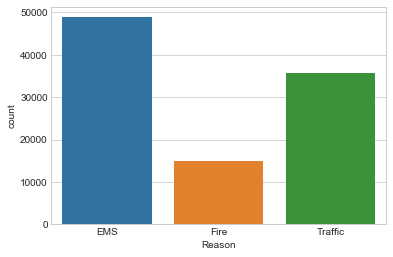

In [12]:
sns.countplot('Reason', data=df)

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [13]:
type(df['timeStamp'].iloc[1])

str

** You should have seen that these timestamps are still strings. Convert the column from strings to DateTime objects.**

In [14]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [15]:
df['timeStamp'].dtypes

dtype('<M8[ns]')

** Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column.**

In [16]:
df['Hour']=df['timeStamp'].apply(lambda x:x.hour)
df['Month']=df['timeStamp'].apply(lambda x:x.month)
df['Day']=df['timeStamp'].apply(lambda x:x.dayofweek)

In [17]:
df[['Day']].head()

,Day
0,3
1,3
2,3
3,3
4,3


** As we can see that the "Day" is an integer between 0 and 6. We need to map the actual string names to the day of the week. **

In [18]:
dayMap={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

In [19]:
df['Day']=df['Day'].map(dayMap)

In [20]:
df[['Day']].head()

,Day
0,Thursday
1,Thursday
2,Thursday
3,Thursday
4,Thursday


## Exploratory Data Analysis (EDA)

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column: **

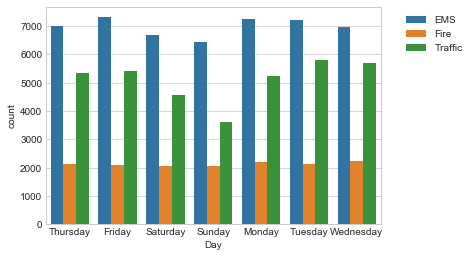

In [21]:
sns.countplot('Day',data=df,hue='Reason')
plt.legend(bbox_to_anchor=(1.05,1),loc=2)

** Now do the same for Month:**

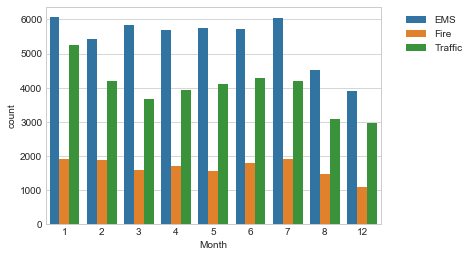

In [22]:
sns.countplot('Month',data=df,hue='Reason')
plt.legend(bbox_to_anchor=(1.05,1),loc=2)

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months.**

** Now create a gropuby object called byMonth, where you group the df by the month column and use the count() method for aggregation. **

In [23]:
byMonth=df.groupby('Month').count()

In [24]:
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


** Now create a simple plot off of the df indicating the count of calls per month. **

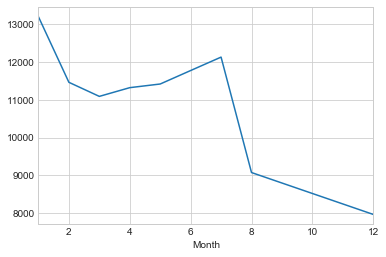

In [25]:
byMonth['twp'].plot()

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

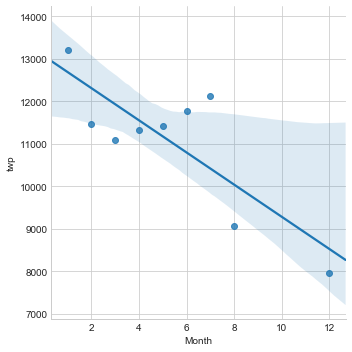

In [26]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

**Create a new column called 'Date' that contains the date from the timeStamp column. ** 

In [27]:
df['Date']=df['timeStamp'].apply(lambda x:x.date())

In [28]:
df[['Date']].head()

,Date
0,2015-12-10
1,2015-12-10
2,2015-12-10
3,2015-12-10
4,2015-12-10


** Now groupby this Date column and create a plot of counts of 911 calls.**

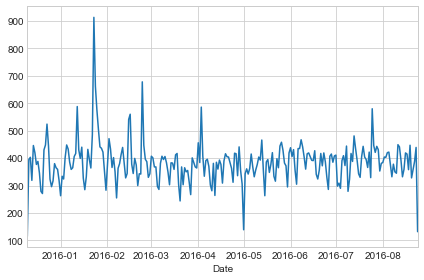

In [32]:
df.groupby('Date')['twp'].count().plot()
plt.tight_layout()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

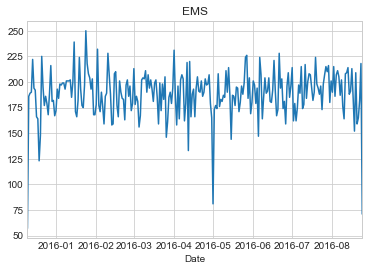

In [30]:
df[df['Reason']=='EMS'].groupby('Date')['twp'].count().plot()
plt.title('EMS')

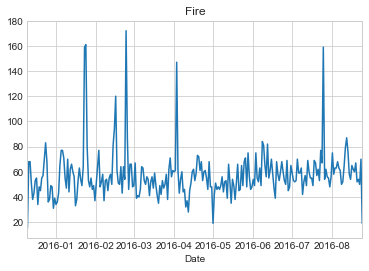

In [33]:
df[df['Reason']=='Fire'].groupby('Date')['twp'].count().plot()
plt.title('Fire')

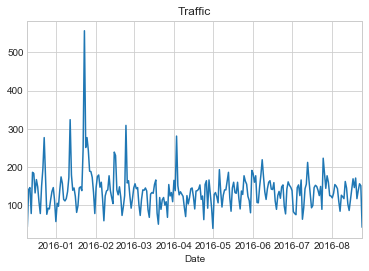

In [34]:
df[df['Reason']=='Traffic'].groupby('Date')['twp'].count().plot()
plt.title('Traffic')

** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day.**

In [35]:
dayHour=df.groupby(['Day','Hour'])['twp'].count().unstack()

In [36]:
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day,,,,,,,,,,,,,,,,,,,,,
Friday,275,235,191,175,201,194,372,598,742,752,...,931,980,1039,980,819,696,667,558,514,474
Monday,282,220,201,194,204,267,397,653,819,785,...,869,913,988,997,885,746,612,496,471,325
Saturday,373,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,627,571,505,467
Sunday,383,304,285,268,242,240,300,401,483,620,...,684,691,663,714,670,654,537,461,415,330
Thursday,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1011,810,698,617,553,424,354
Tuesday,269,240,186,170,209,239,414,655,889,878,...,942,938,1026,1018,905,731,647,570,462,274
Wednesday,249,216,189,207,156,254,409,701,875,808,...,903,867,989,1036,894,686,668,574,490,334


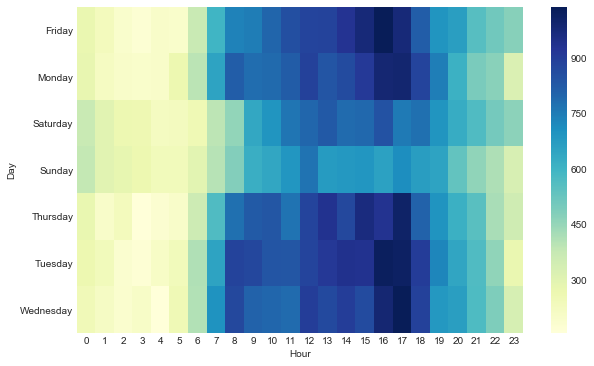

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(dayHour,cmap="YlGnBu")

** Now create a clustermap using this DataFrame **

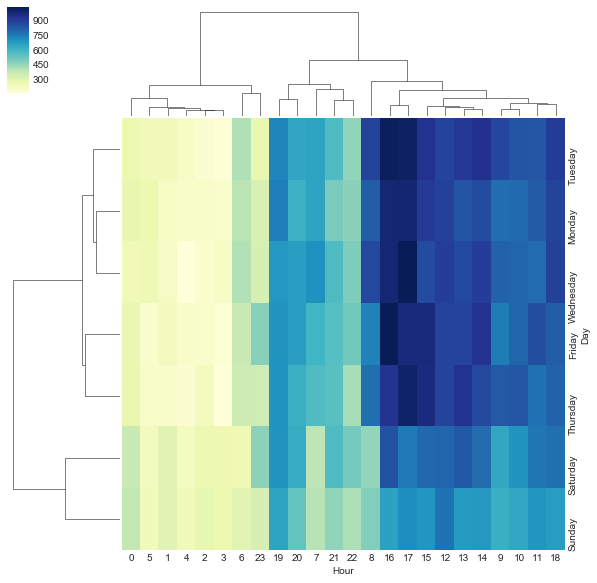

In [38]:
sns.clustermap(dayHour,cmap="YlGnBu")

** Then We restructure the dataframe again that the columns become the Month and the Index becomes the Day.**

In [39]:
dayMonth=df.groupby(['Day','Month'])['twp'].count().unstack()

In [40]:
dayMonth

Month,1,2,3,4,5,6,7,8,12
Day,,,,,,,,,
Friday,1970,1581,1523,1958,1730,1649,2045,1310,1064
Monday,1727,1964,1533,1597,1779,1617,1692,1509,1256
Saturday,2290,1440,1264,1732,1444,1388,1695,1099,978
Sunday,1960,1229,1100,1488,1422,1331,1672,1021,907
Thursday,1584,1596,1900,1601,1590,2065,1646,1227,1265
Tuesday,1973,1753,1884,1430,1917,1673,1668,1612,1233
Wednesday,1699,1902,1888,1517,1538,2054,1715,1295,1260


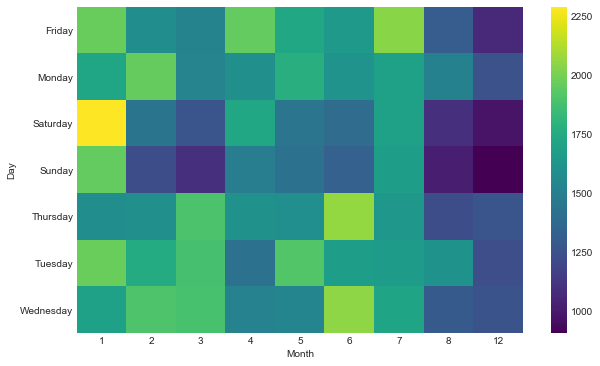

In [41]:
plt.figure(figsize=(10,6))
sns.heatmap(dayMonth,cmap='viridis')

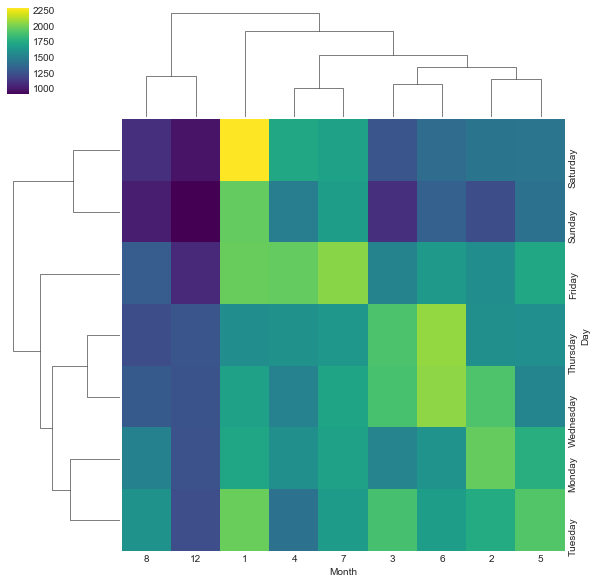

In [42]:
sns.clustermap(dayMonth,cmap='viridis')